In [1]:
import sys
sys.path.insert(0, "/Users/Work/Developer/interpretDL/Pipeline")

In [3]:
import numpy as np
import pandas as pd
import umap

# from ClusterPipeline import ClusterPipeline
from helper import split_valid, plot_confusion_matrix, plot_history
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

RANDOM_STATE = 42
np.random.seed(seed=RANDOM_STATE) 

In [4]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.close("History")
    fig, axs = plt.subplots(1, 2, figsize=(16,8),num="History")

    # Plot training & validation accuracy values
    axs[0].grid(True)
    axs[0].plot(history.history['acc'])
    axs[0].plot(history.history['val_acc'])
    axs[0].set(title='Model accuracy', ylabel='Accuracy', xlabel='Epoch')
    axs[0].legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    axs[1].grid(True)
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set(title='Model loss',ylabel='Loss', xlabel='Epoch')
    axs[1].legend(['Train', 'Test'], loc='upper left')

    plt.show()

In [8]:
fname = "data/cleaned_SA.csv"
raw_data = pd.read_csv(fname, index_col=0)
raw_data.head()

,ASD_DX_group,Risk,ROI01,ROI02,ROI03,ROI04,ROI05,ROI06,ROI07,ROI08,...,ROI324,ROI325,ROI326,ROI327,ROI328,ROI329,ROI330,ROI331,ROI332,ROI333
CandID,,,,,,,,,,,,,,,,,,,,,
103430,TYPICAL,HR,529.158386,298.568665,190.627472,134.555801,363.573608,646.810547,33.957870,172.629700,...,46.523426,88.635681,15.326110,268.573364,143.174347,1.515198,239.148468,20.107052,34.309757,10.180353
107524,ASD,HR,518.345703,311.013794,118.777634,198.685638,477.074524,405.450134,55.401951,126.927612,...,30.664413,76.203514,25.545485,188.544678,107.464104,1.381342,188.476715,17.961386,23.440365,14.530558
108372,TYPICAL,LR,443.658081,156.824844,157.223099,147.381149,492.784088,305.069519,61.638298,136.602600,...,35.009350,99.737000,23.199062,282.846497,29.161158,0.722310,200.596985,28.989164,32.400013,10.532928
113320,TYPICAL,LR,529.817078,301.160583,129.092483,151.090851,395.564331,597.880981,32.048248,163.701218,...,40.359753,111.341911,15.794782,214.678467,75.857338,1.767594,179.606552,16.667351,44.315159,12.016207
114640,TYPICAL,LR,689.399170,303.337524,154.169434,98.182709,592.248962,364.648315,10.539658,142.580795,...,49.686398,134.082794,18.534616,217.291306,36.213020,1.580427,181.796356,22.934441,63.739361,10.897783


In [9]:
raw_data.shape

(325, 335)

In [12]:
label_cols = ["ASD_DX_group", "Risk"]
noisy_cols = []

features = raw_data.drop(columns=noisy_cols+label_cols)
features.head()

,ROI01,ROI02,ROI03,ROI04,ROI05,ROI06,ROI07,ROI08,ROI09,ROI10,...,ROI324,ROI325,ROI326,ROI327,ROI328,ROI329,ROI330,ROI331,ROI332,ROI333
CandID,,,,,,,,,,,,,,,,,,,,,
103430,529.158386,298.568665,190.627472,134.555801,363.573608,646.810547,33.957870,172.629700,58.659229,88.770279,...,46.523426,88.635681,15.326110,268.573364,143.174347,1.515198,239.148468,20.107052,34.309757,10.180353
107524,518.345703,311.013794,118.777634,198.685638,477.074524,405.450134,55.401951,126.927612,57.548630,43.613918,...,30.664413,76.203514,25.545485,188.544678,107.464104,1.381342,188.476715,17.961386,23.440365,14.530558
108372,443.658081,156.824844,157.223099,147.381149,492.784088,305.069519,61.638298,136.602600,11.748866,51.033894,...,35.009350,99.737000,23.199062,282.846497,29.161158,0.722310,200.596985,28.989164,32.400013,10.532928
113320,529.817078,301.160583,129.092483,151.090851,395.564331,597.880981,32.048248,163.701218,47.578297,46.981075,...,40.359753,111.341911,15.794782,214.678467,75.857338,1.767594,179.606552,16.667351,44.315159,12.016207
114640,689.399170,303.337524,154.169434,98.182709,592.248962,364.648315,10.539658,142.580795,149.398560,54.505650,...,49.686398,134.082794,18.534616,217.291306,36.213020,1.580427,181.796356,22.934441,63.739361,10.897783


In [37]:
labels = raw_data[label_cols].copy()
labels

,ASD_DX_group,Risk
CandID,,
103430,TYPICAL,HR
107524,ASD,HR
108372,TYPICAL,LR
113320,TYPICAL,LR
114640,TYPICAL,LR
118969,TYPICAL,HR
119906,TYPICAL,LR
121007,ATYPICAL_ADOS,HR
123794,TYPICAL,HR


In [17]:
labels["Risk"][labels["Risk"]=="HR"].value_counts()

TYPICAL            149
ASD                 39
ATYPICAL_ADOS       17
ATYPICAL_MULLEN      9
Name: ASD_DX_group, dtype: int64

In [18]:
labels["ASD_DX_group"][labels["Risk"]=="LR"].value_counts()

TYPICAL            99
ATYPICAL_ADOS       7
ASD                 3
ATYPICAL_MULLEN     2
Name: ASD_DX_group, dtype: int64

In [50]:
LR = labels["Risk"]=="LR"
typical = labels["ASD_DX_group"]=="TYPICAL"
LR_typical = labels[LR & typical]

In [51]:
HR = labels["Risk"]=="HR"
HR_nontypical = labels[HR & ~typical]

In [52]:
analysis_labels = pd.concat((LR_typical, HR_nontypical))
analysis_labels["Risk"].value_counts()

LR    99
HR    65
Name: Risk, dtype: int64

In [53]:
enc = OrdinalEncoder()
enc.fit(analysis_labels)
enc_labels = enc.transform(analysis_labels)
enc.categories_

[array(['ASD', 'ATYPICAL_ADOS', 'ATYPICAL_MULLEN', 'TYPICAL'], dtype=object),
 array(['HR', 'LR'], dtype=object)]

In [58]:
enc_labels[:,0]

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 2., 0., 0., 0., 2., 0., 0.,
       0., 0., 2., 0., 0., 0., 2., 1., 0., 2., 1., 0., 0., 1., 2., 0., 1.,
       0., 2., 2., 1., 0., 0., 2., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.])

In [70]:
risk_labels = pd.Series(enc_labels[:,1], dtype=int)
data = features.loc[analysis_labels.index].copy()

# Separating a hold out set that will be used for validation of the pipeline
train_data, train_labels, test_data, test_labels = split_valid(data, risk_labels, valid_size=0.1)

train_labels.value_counts()

1    89
0    58
dtype: int64

In [71]:
def build_dnn(num_features, num_labels, activation="elu"):
    
    import tensorflow as tf
    import keras
    from keras import optimizers
    from keras import regularizers
    keras.backend.clear_session()
    
    reg_scale = 0.01 # For L1 Reg
    my_reg = regularizers.l1(reg_scale) # Can change this if needed
    
    dnn = keras.models.Sequential()

    Dense = keras.layers.Dense

    # Using He initialization
    he_init = keras.initializers.he_normal()
    
    dnn.add(Dense(units = 256, activation=activation, input_dim=num_features,
                  kernel_initializer=keras.initializers.he_normal(), kernel_regularizer = regularizers.l1(reg_scale)))
    dnn.add(keras.layers.Dropout(0.2))
    dnn.add(Dense(units = 50, activation=activation,
                  kernel_initializer=keras.initializers.he_normal(), kernel_regularizer = regularizers.l1(reg_scale)))
    dnn.add(keras.layers.Dropout(0.2))
    
    dnn.add(Dense(units=num_labels, activation="sigmoid",
                  kernel_initializer=he_init, kernel_regularizer = my_reg)) # 5 labels -> logits for now
    
#     nadam = keras.optimizers.Nadam()
    NSGD = keras.optimizers.SGD(lr=0.01,momentum=0.9,nesterov=True)
    
    dnn.compile(loss='binary_crossentropy',
                  optimizer="sgd",
                  metrics=['accuracy']) #Internally it seems to be same as binary accuracy
    
    return dnn

In [72]:
dnn = build_dnn(num_features=data.shape[1], num_labels=1)
dnn.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               85504     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                12850     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 98,405
Trainable params: 98,405
Non-trainable params: 0
_________________________________________________________________


In [73]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

ZScaler = StandardScaler().fit(train_data)
X_train = ZScaler.transform(train_data)
X_valid = ZScaler.transform(test_data)

y_train = train_labels.values.reshape(-1,1)
y_valid = test_labels.values.reshape(-1,1)

class_weight = compute_class_weight("balanced", np.unique(train_labels), train_labels)

dnn = build_dnn(num_features=data.shape[1], num_labels=1, activation="relu")
history = dnn.fit(X_train, y_train, validation_data=(X_valid,y_valid), class_weight=class_weight,
                  epochs=100, batch_size=20, verbose=1)

Instructions for updating:
Use tf.cast instead.


/Users/Work/anaconda3/envs/condatensor/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Train on 147 samples, validate on 17 samples
Epoch 1/100
147/147 [==============================] - 0s 2ms/step - loss: 64.3374 - acc: 0.5170 - val_loss: 63.7011 - val_acc: 0.7059
Epoch 2/100
147/147 [==============================] - 0s 90us/step - loss: 63.4438 - acc: 0.5782 - val_loss: 62.9188 - val_acc: 0.7059
Epoch 3/100
147/147 [==============================] - 0s 90us/step - loss: 62.6385 - acc: 0.5850 - val_loss: 62.1403 - val_acc: 0.7059
Epoch 4/100
147/147 [==============================] - 0s 90us/step - loss: 61.7741 - acc: 0.6599 - val_loss: 61.3682 - val_acc: 0.7059
Epoch 5/100
147/147 [==============================] - 0s 95us/step - loss: 61.0293 - acc: 0.6190 - val_loss: 60.6068 - val_acc: 0.7059
Epoch 6/100
147/147 [==============================] - 0s 95us/step - loss: 60.2633 - acc: 0.6395 - val_loss: 59.8552 - val_acc: 0.6471
Epoch 7/100
147/147 [==============================] - 0s 93us/step - loss: 59.4278 - acc: 0.7075 - val_loss: 59.1158 - val_acc: 0.6471
Epoc

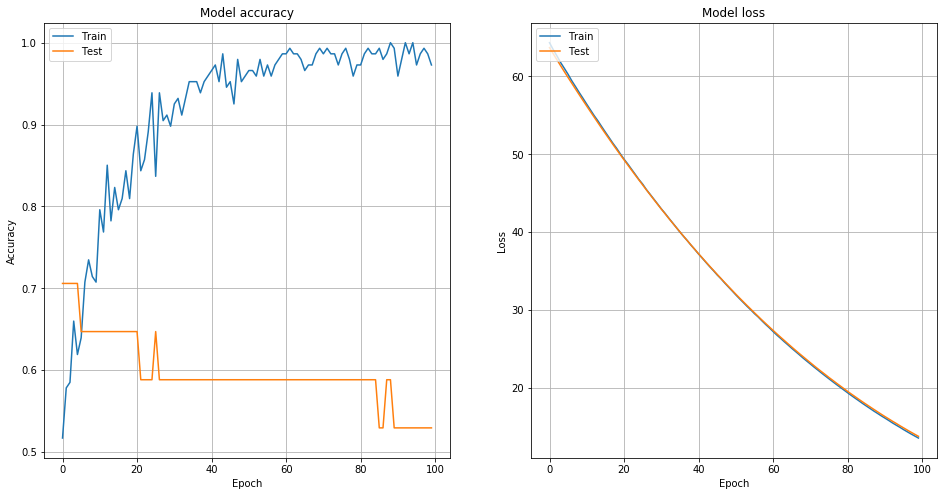

17/17 [==============================] - 0s 46us/step
Loss:13.792, Acc:0.5294


In [74]:
plot_history(history)
print("Loss:{:0.3f}, Acc:{:.4f}".format(*dnn.evaluate(X_valid,y_valid)))

In [187]:
np.ravel(dnn.predict(X_valid))

array([0.337165  , 0.33813494, 0.34095788, 0.34239393, 0.33329833,
       0.34421083, 0.3387261 , 0.33894312, 0.3414331 , 0.34130478,
       0.33208334, 0.33778822, 0.34628335, 0.34039393, 0.33600765,
       0.34061933, 0.33606702, 0.3513162 , 0.3398225 , 0.3424525 ,
       0.3409766 , 0.32812676, 0.33804864, 0.34513864, 0.33702117,
       0.34089005, 0.33875608, 0.3396973 , 0.3380875 , 0.33712077,
       0.3341869 , 0.33875692, 0.33594385, 0.3404556 , 0.3375757 ,
       0.3422922 , 0.33802232, 0.33699304], dtype=float32)

In [189]:
y_pred = dnn.predict(X_valid)

# plot_confusion_matrix(np.ravel(y_valid), np.ravel(y_pred), np.array(["HR", "LR"]))

### Using elu

In [172]:
dnn = build_dnn(num_features=data.shape[1], num_labels=1, activation="elu")
history = dnn.fit(X_train, y_train, validation_data=(X_valid,y_valid), class_weight=class_weight,
                  epochs=100, batch_size=10, verbose=1)

Train on 342 samples, validate on 38 samples
Epoch 1/100
342/342 [==============================] - 0s 892us/step - loss: 8.6136 - acc: 0.5058 - val_loss: 8.3087 - val_acc: 0.5789
Epoch 2/100
342/342 [==============================] - 0s 96us/step - loss: 8.2633 - acc: 0.5468 - val_loss: 8.0529 - val_acc: 0.6053
Epoch 3/100
342/342 [==============================] - 0s 91us/step - loss: 8.0046 - acc: 0.5760 - val_loss: 7.8185 - val_acc: 0.5526
Epoch 4/100
342/342 [==============================] - 0s 94us/step - loss: 7.7666 - acc: 0.5994 - val_loss: 7.5965 - val_acc: 0.5789
Epoch 5/100
342/342 [==============================] - 0s 93us/step - loss: 7.5416 - acc: 0.6228 - val_loss: 7.3794 - val_acc: 0.6316
Epoch 6/100
342/342 [==============================] - 0s 92us/step - loss: 7.3214 - acc: 0.6287 - val_loss: 7.1780 - val_acc: 0.6316
Epoch 7/100
342/342 [==============================] - 0s 91us/step - loss: 7.1325 - acc: 0.6082 - val_loss: 6.9927 - val_acc: 0.6316
Epoch 8/100
342/

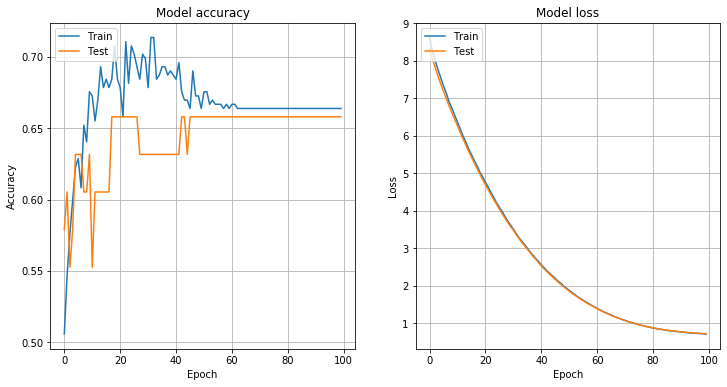

38/38 [==============================] - 0s 39us/step
Loss:0.725, Acc:0.6579


In [173]:
plot_history(history)
print("Loss:{:0.3f}, Acc:{:.4f}".format(*dnn.evaluate(X_valid,y_valid)))

### Using SMOTE

Using SMOTE


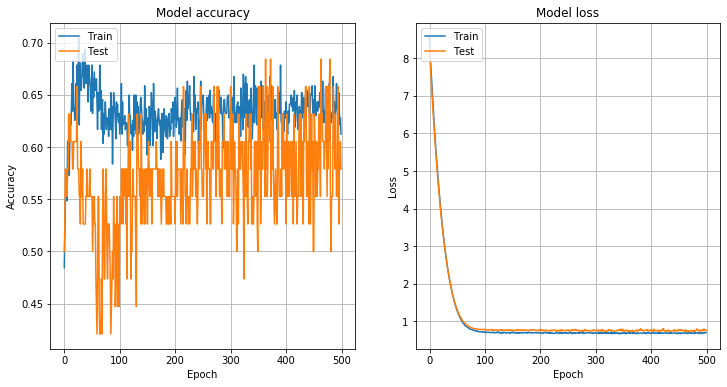

In [160]:
print("Using SMOTE")
X_train,y_train = SMOTE(random_state=RANDOM_STATE).fit_resample(train_data,np.ravel(train_labels)) # Both are np arrays now
X_train = ZScaler.transform(X_train)
y_train = y_train.reshape(-1,1)

class_weight=None
dnn_Mah = build_dnn(num_features=data.shape[1], num_labels=1, activation="relu")
history = dnn_Mah.fit(X_train, y_train, validation_data=(X_valid,y_valid), class_weight=class_weight,
                  epochs=500, batch_size=10, verbose=0)
plot_history(history)

In [161]:
dnn_Mah.evaluate(X_valid,y_valid)

38/38 [==============================] - 0s 96us/step


[0.7657423772309956, 0.5789473684210527]